## Amazon UK Products Dataset 2023 (2.2M Products) [Cont.]

### Classification

Source: Kaggle.com (https://www.kaggle.com/datasets/asaniczka/amazon-uk-products-dataset-2023)

This dataset contains details of sales for 2.2 million products, with ten columns from Product ID to Product Category. In this section, we attempt to use stars, reviews, price, boughtInLastMonth to predict whether the prodct is the best seller in the last month. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("amz_uk.csv")

In [2]:
x=df[['stars','reviews','price','boughtInLastMonth']]
y=df['isBestSeller']

y=y.replace({False:0,True:1})

In [3]:
from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test=split(x,y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

0    2216724
1       6018
Name: isBestSeller, dtype: int64

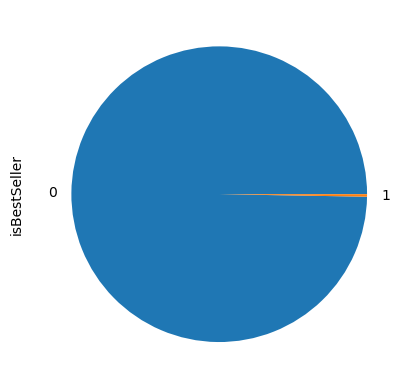

In [8]:
y.value_counts().plot.pie()
y.value_counts()


High sample imbalance as the positive (1) values are negligibly small 

### Logistic Regression

Let's try logistic regression to observe how this huge imbalance impact the predictability

In [10]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

y_pred=lg.predict(x_test)

0.9972601445509944

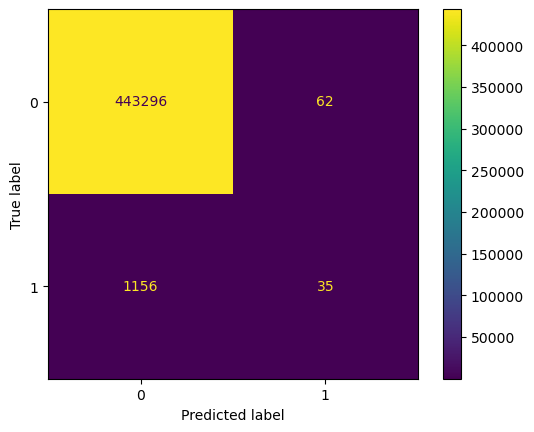

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)
#classification_report(y_test,y_pred)

### Random Forest Regression 

Let's try Random Forest Regression as ensemble-based classification models have high level of accuracy in most cases. 

In [12]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(n_estimators=100,min_samples_split=2, criterion='entropy')
random.fit(x_train,y_train)

y_pred_rf=random.predict(x_test)

0.9972016583098826

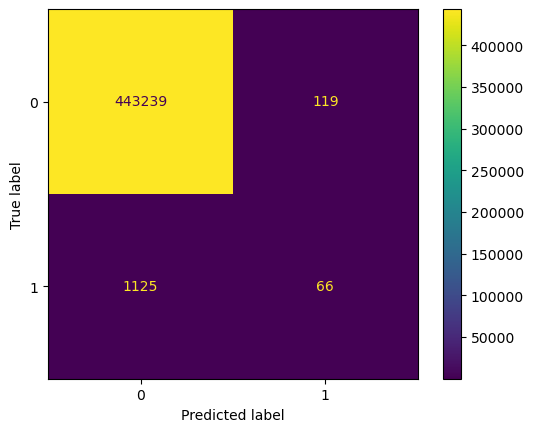

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
accuracy_score(y_test,y_pred_rf)

Both Logistic and Random Forest regression models failed to provide a proper prediction, with high Type ! and Type II error numbers, due to high imbalance in dependent variable. We will see a remedy to this issue through oversampling in the next section. 